In [1]:
import os
import glob
import sys

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
base_path = '../experiments/'
model = 'efficientnet'

METHODS = {
#     "ig": "ig",
    "sailency": "sailency",
    "gradcam": "gradcam",
    "deconv": "deconv",
    "gbp": "gbp",
}

SPLIT_OPTIONS = ["100%", "80%", "60%", "40%", "20%"]

DATASETS = {
    "edible-plants": "edible-plants",
    "food101": "food101",
    "marvel": "marvel",
    "plant-data": "plant-data",
    "stanford-dogs": "stanford-dogs",
}
ACC = {}
F1 = {}

fig_size = (30,16)
title_font=32
label_font=28
marker_size=18

plt.rcParams.update({'font.size': 22})

In [3]:
for dataset in DATASETS.keys():
    for data_split in SPLIT_OPTIONS:
        path = os.path.join('../models/evals', f"{model}-{dataset}-{data_split}.csv")
        res_df = pd.read_csv(path, names=['f1', 'acc'])        
        
        if dataset not in ACC:
            ACC[dataset] = {}
        if dataset not in F1:
            F1[dataset] = {}
        
        ACC[dataset][data_split] = float(res_df['acc'])
        F1[dataset][data_split] = float(res_df['f1'])

In [4]:
scores = []
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        for data_split in SPLIT_OPTIONS:
            path = os.path.join(base_path, dataset, f"{model}-{data_split}", method, f"{model}-{dataset}-{method}.csv")
            df = pd.read_csv(path)
            df = df.mean(axis=0)
            scores.append([model, dataset, data_split, method, ACC[dataset][data_split], F1[dataset][data_split], df['# infidelity'], df['sensitivity']])
       

In [5]:
scores_df = pd.DataFrame(np.array(scores), columns=['model', 'dataset', 'data_split', 'method', 'acc', 'f1', 'infidelity', 'sensitivity'])
scores_df['acc'] = scores_df['acc'].map(lambda x: float(x))
scores_df['f1'] = scores_df['f1'].map(lambda x: float(x))

In [7]:
scores_df[scores_df['method'] == 'gbp']

,model,dataset,data_split,method,acc,f1,infidelity,sensitivity
15,efficientnet,edible-plants,100%,gbp,0.8067,0.7359,0.00035617381144836525,1.3489909014394206
16,efficientnet,edible-plants,80%,gbp,0.7805,0.7253,0.0002728828867724763,1.3621594748189372
17,efficientnet,edible-plants,60%,gbp,0.7165,0.6338,0.00024659066042101674,1.3654942327930082
18,efficientnet,edible-plants,40%,gbp,0.5760,0.5312,0.00031382852898933643,1.3703075428162852
19,efficientnet,edible-plants,20%,gbp,0.3392,0.2713,0.0006797973597423562,1.395196351697368
35,efficientnet,food101,100%,gbp,0.8374,0.8368,0.0038630080458111333,1.556359532823657
36,efficientnet,food101,80%,gbp,0.8253,0.8248,0.004316157931208353,1.5242898733072943
37,efficientnet,food101,60%,gbp,0.8140,0.8131,0.003573077484539717,1.4610481944650706
38,efficientnet,food101,40%,gbp,0.7871,0.7870,0.0028545769900291014,1.5414600827670333
39,efficientnet,food101,20%,gbp,0.7395,0.7385,0.0018262420958605374,1.4671703341219684


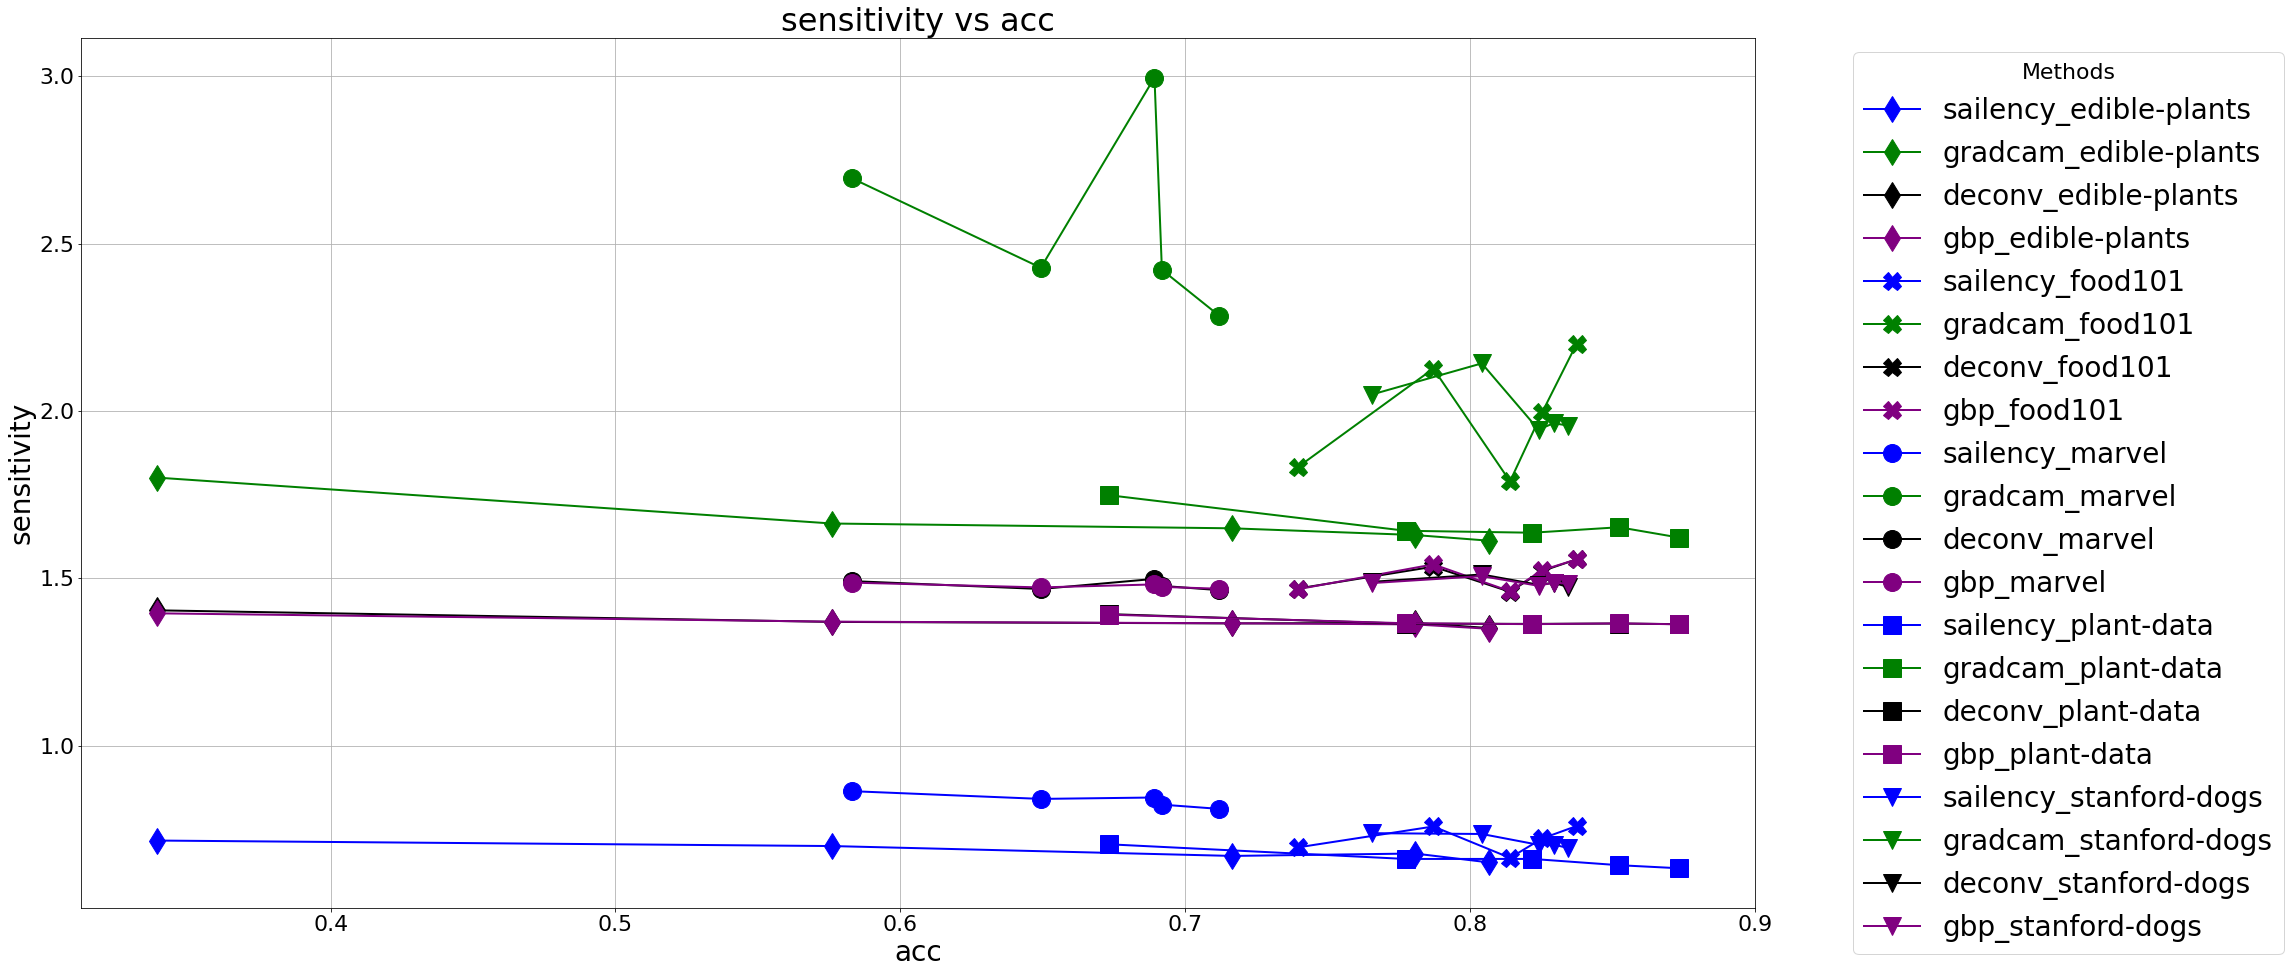

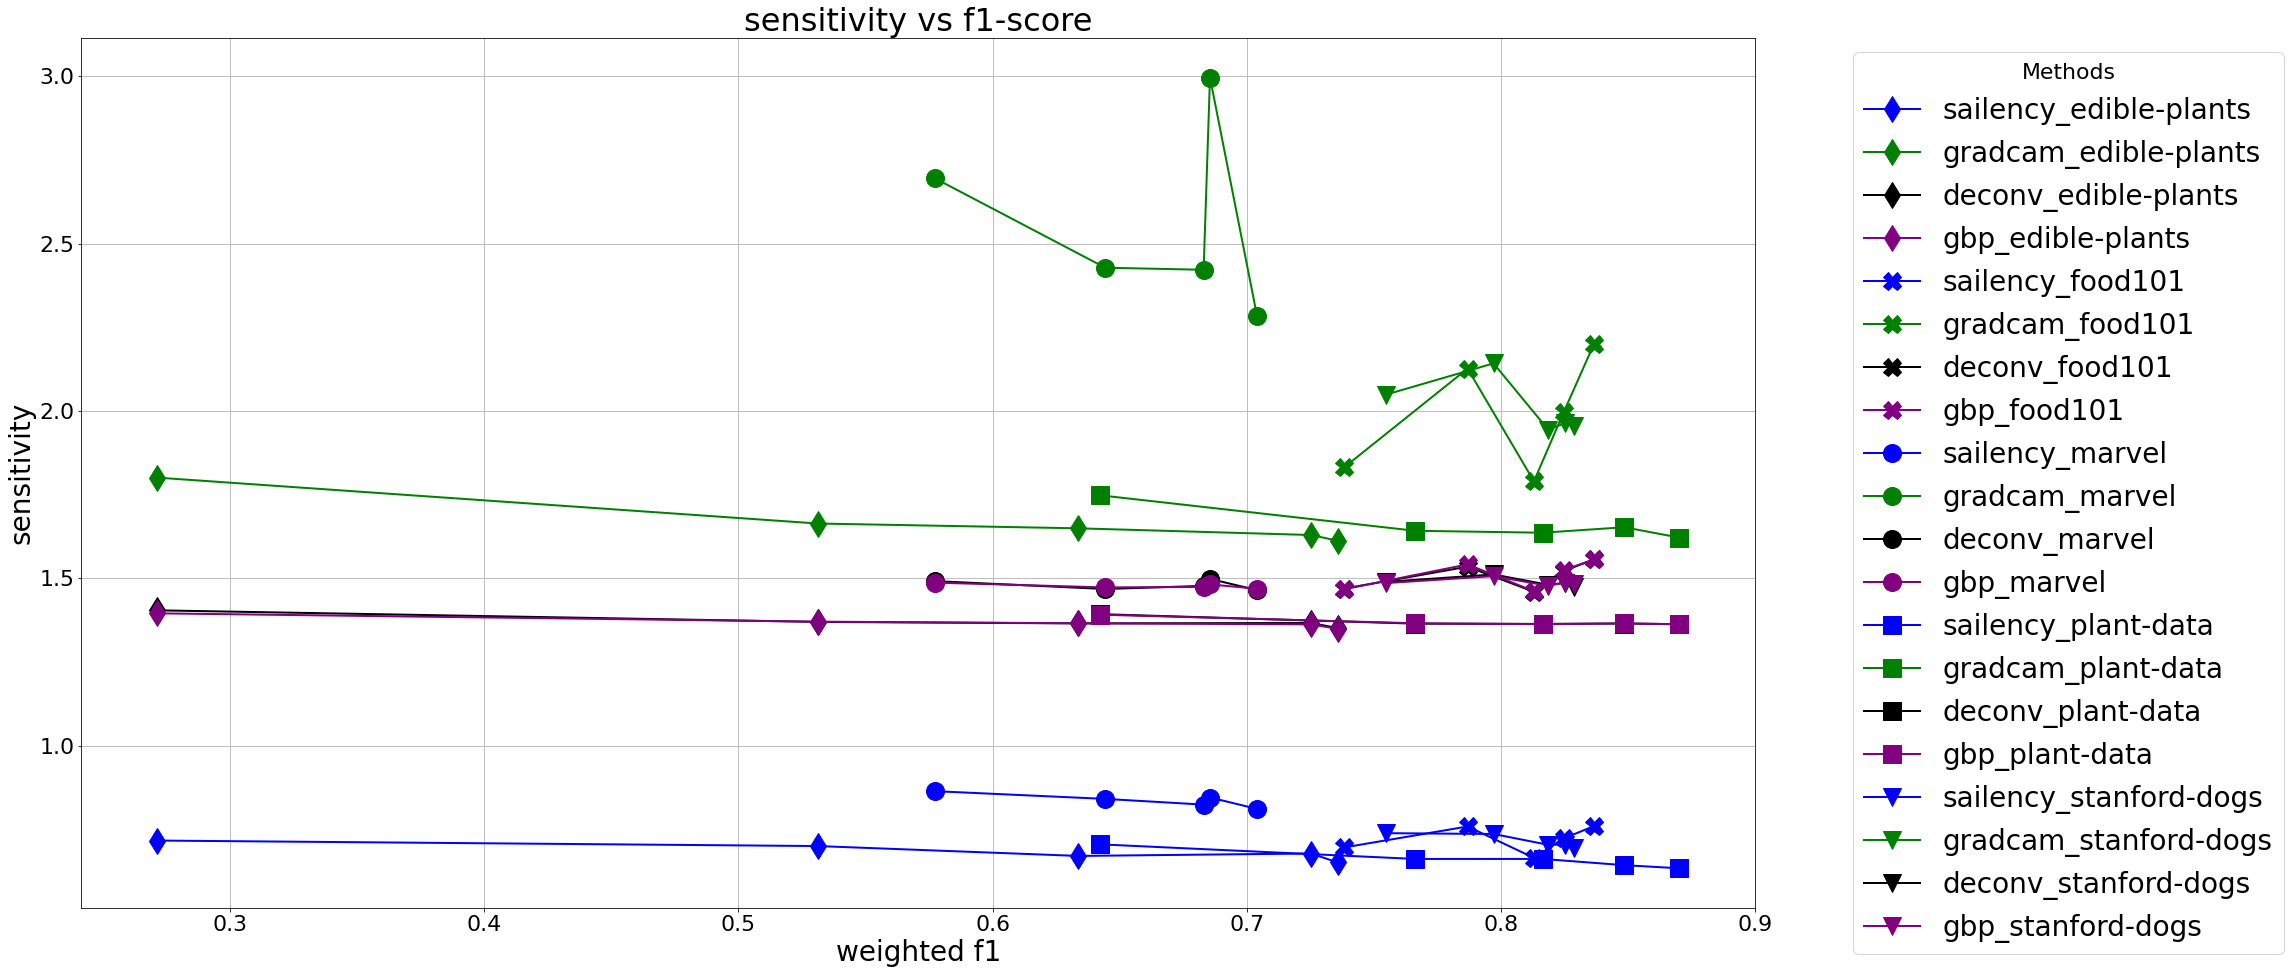

In [8]:
COLORS = {
#     "ig": "red",
    "sailency": "blue",
    "gradcam": "green",
    "deconv": "black",
    "gbp": "purple",
}
MARKERS = {
    "edible-plants": "d",
    "food101": "X",
    "marvel": "o",
    "plant-data": "s",
    "stanford-dogs": "v",
}
plt.figure(figsize=fig_size) 

for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['acc'])
        filter_df['sensitivity'] = filter_df['sensitivity'].map(lambda x: float(x))

        plt.plot(filter_df['acc'], filter_df['sensitivity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('sensitivity vs acc', fontsize=title_font)
plt.xlabel('acc', fontsize=label_font)
plt.ylabel('sensitivity', fontsize=label_font)
plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

plt.figure(figsize=fig_size) 

for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['f1'])
        filter_df['sensitivity'] = filter_df['sensitivity'].map(lambda x: float(x))

        plt.plot(filter_df['f1'], filter_df['sensitivity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('sensitivity vs f1-score', fontsize=title_font)
plt.xlabel('weighted f1', fontsize=label_font)
plt.ylabel('sensitivity', fontsize=label_font)
plt.legend( title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

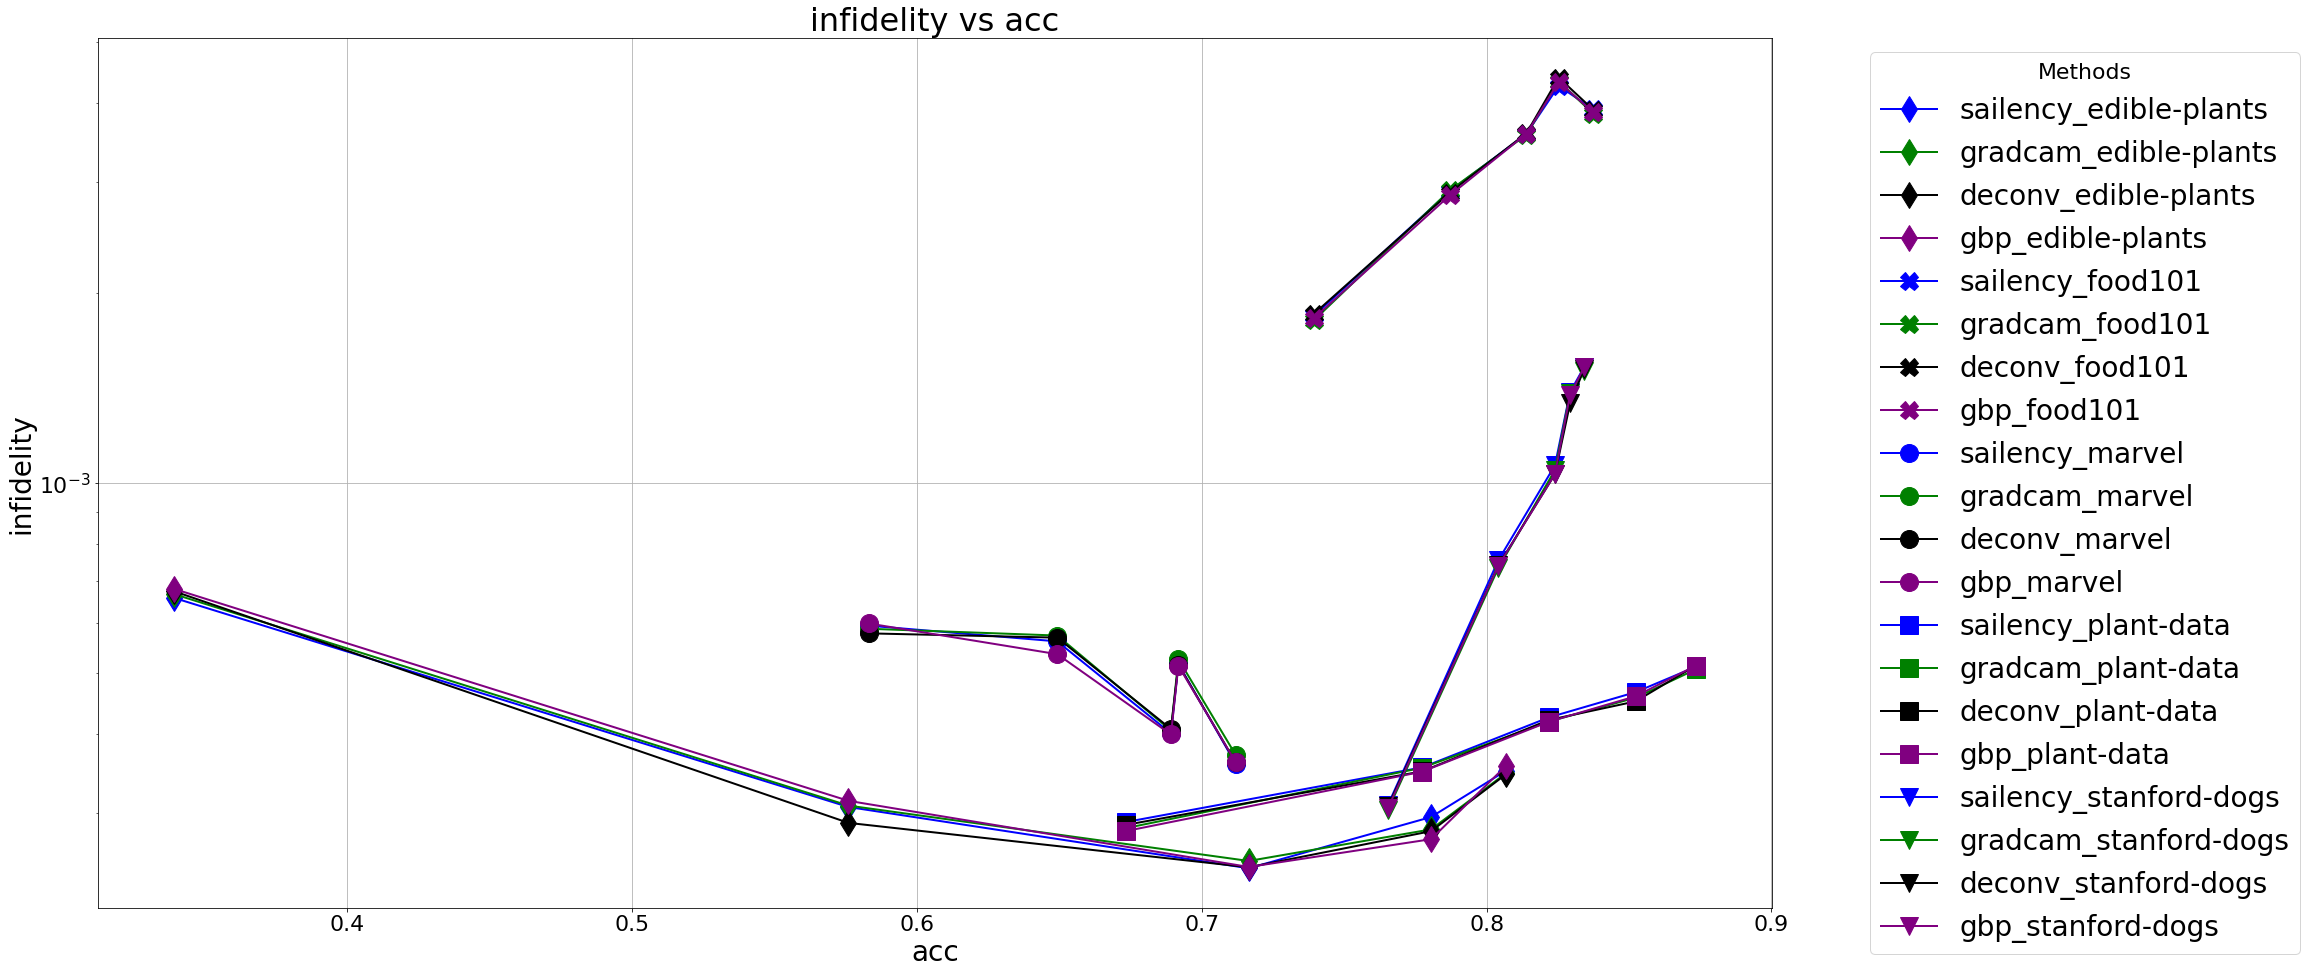

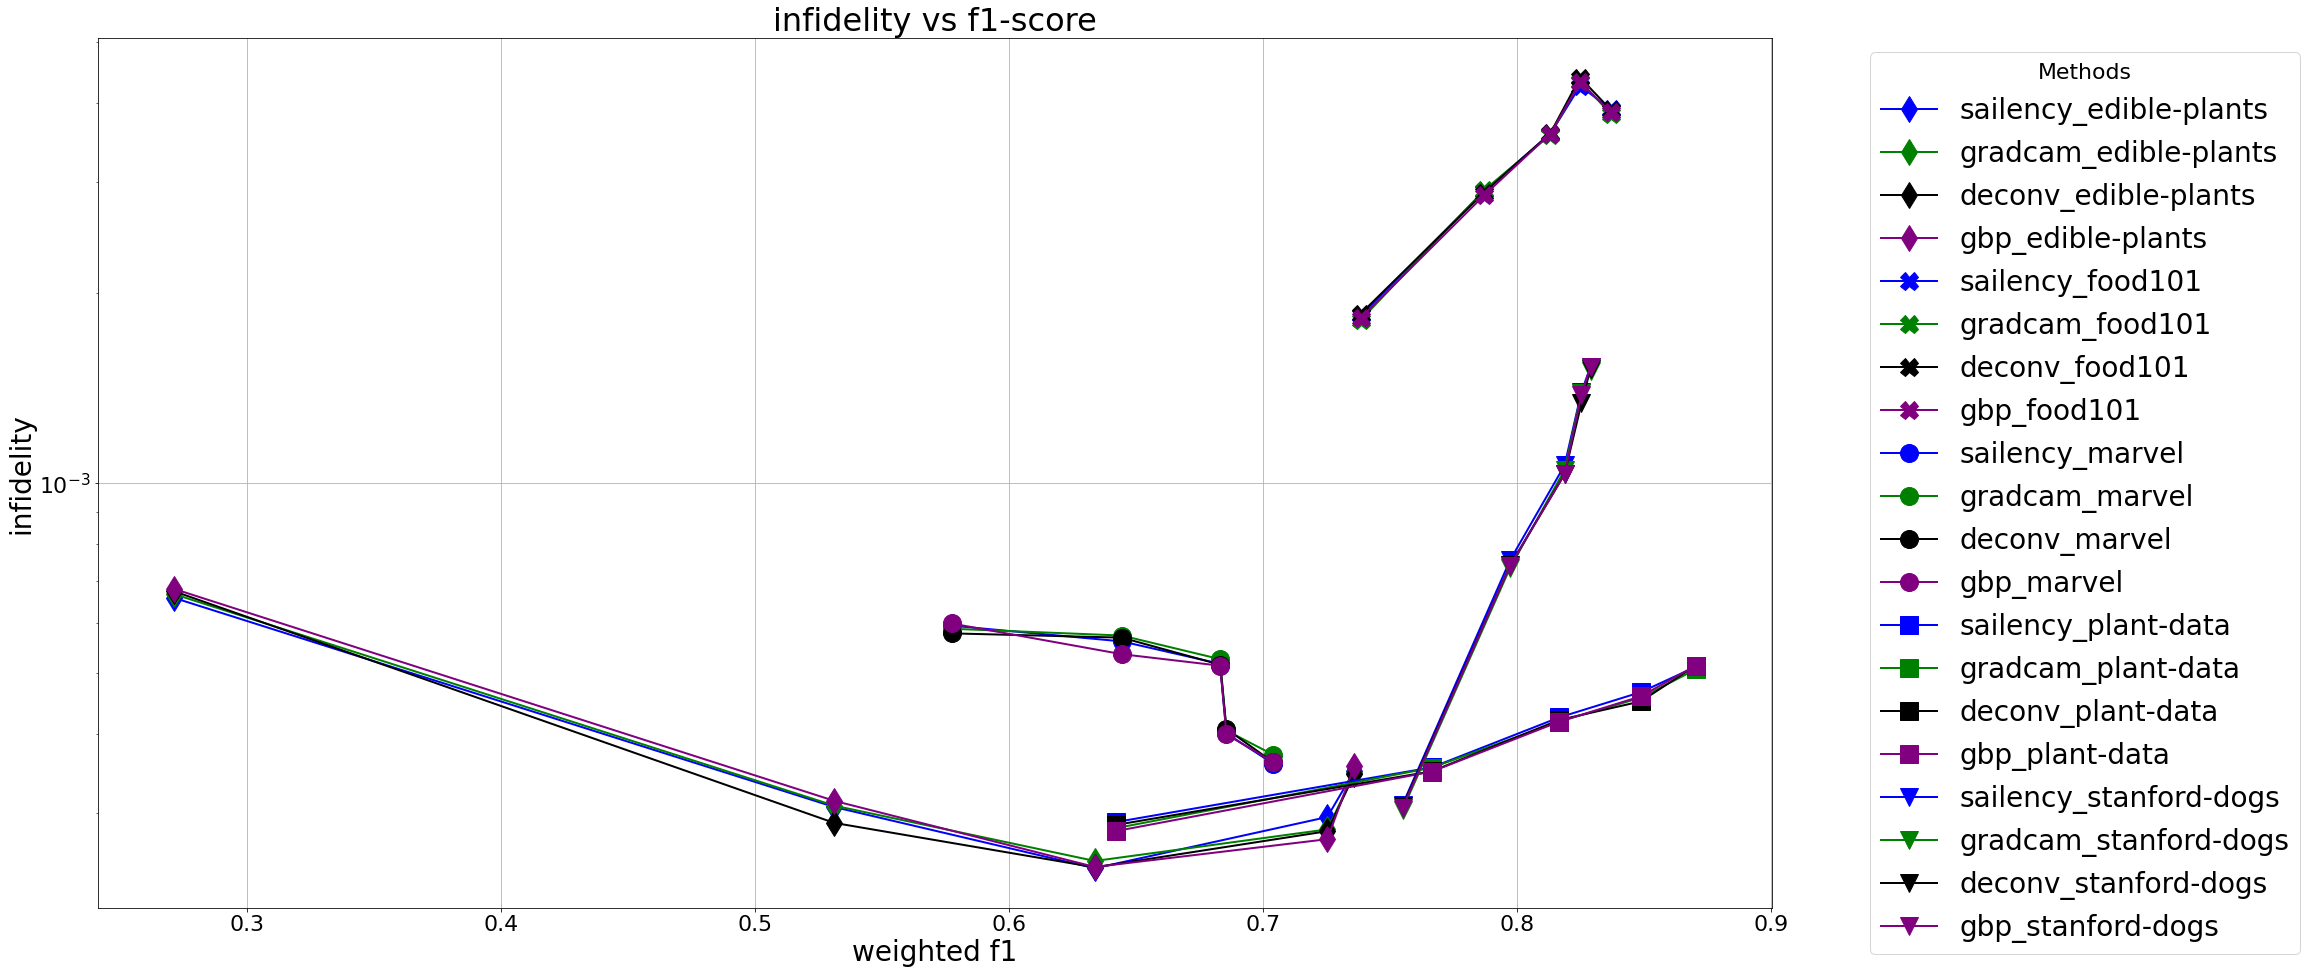

In [9]:

plt.figure(figsize=fig_size) 
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['acc'])
        filter_df['infidelity'] = filter_df['infidelity'].map(lambda x: float(x))

        plt.plot(filter_df['acc'], filter_df['infidelity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('infidelity vs acc', fontsize=title_font)
plt.xlabel('acc', fontsize=label_font)
plt.ylabel('infidelity', fontsize=label_font)
plt.yscale('log')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()

plt.figure(figsize=fig_size) 
for dataset in DATASETS.keys():
    for method in METHODS.keys():
        filter_df = scores_df[(scores_df['method'] == method) & (scores_df['dataset'] == dataset)].sort_values(['f1'])
        filter_df['infidelity'] = filter_df['infidelity'].map(lambda x: float(x))

        plt.plot(filter_df['f1'], filter_df['infidelity'], color=COLORS[method], marker=MARKERS[dataset], label=method+'_'+dataset, linewidth=2, markersize=marker_size)
    
plt.title('infidelity vs f1-score', fontsize=title_font)
plt.xlabel('weighted f1', fontsize=label_font)
plt.ylabel('infidelity', fontsize=label_font)
plt.yscale('log')
plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_font)
plt.grid(True)
plt.show()